## Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.

NO MODELLING WILL BE DONE IN THIS NOTEBOOK!

## Importing and Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/data.csv')
df.drop(columns=['id'], inplace=True)
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,B,22,14,78,451,0.105,0.071,0.190,0.066
97,B,19,27,62,295,0.102,0.053,0.135,0.069
98,B,21,24,74,413,0.090,0.075,0.162,0.066


## Exploratory data analysis

In [3]:
df.isnull().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

Let's impute the output column to make sure we have a numeric output. Since the rest of the data is numeric, we do not need to change any other parameters.

In [4]:
def diag_imputing(col):
    if col == 'M':
        return 0
    elif col == 'B':
        return 1
    else:
        return col
    
df['diagnosis_result'] = df['diagnosis_result'].apply(diag_imputing)
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0,23,12,151,954,0.143,0.278,0.242,0.079
1,1,9,13,133,1326,0.143,0.079,0.181,0.057
2,0,21,27,130,1203,0.125,0.160,0.207,0.060
3,0,14,16,78,386,0.070,0.284,0.260,0.097
4,0,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,0,23,16,132,1264,0.091,0.131,0.210,0.056
96,1,22,14,78,451,0.105,0.071,0.190,0.066
97,1,19,27,62,295,0.102,0.053,0.135,0.069
98,1,21,24,74,413,0.090,0.075,0.162,0.066


<AxesSubplot:>

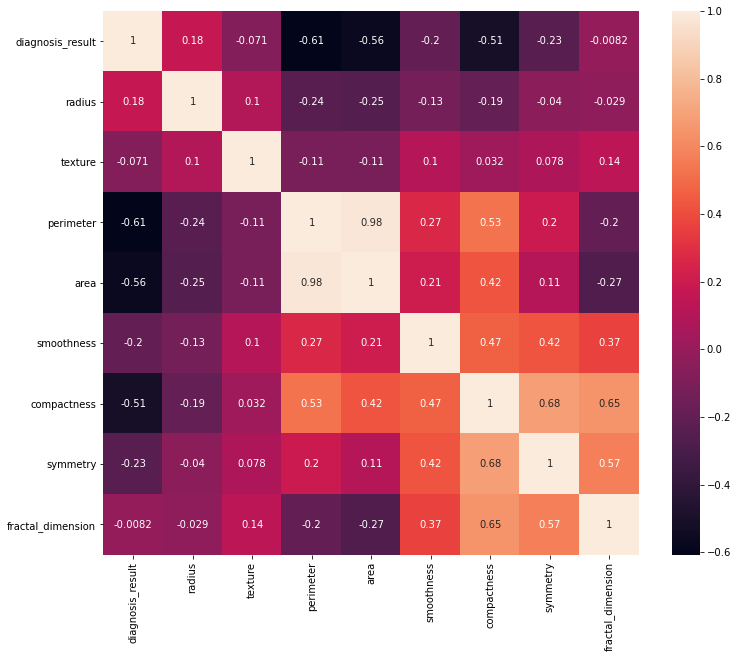

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Looking at the above heatmap, we can see that **'perimeter', 'area', 'compactness', 'symmetry'** are the most correlated to the now numerised final class.

We can now make a focused pairplot to see how well they help in classifying the output.

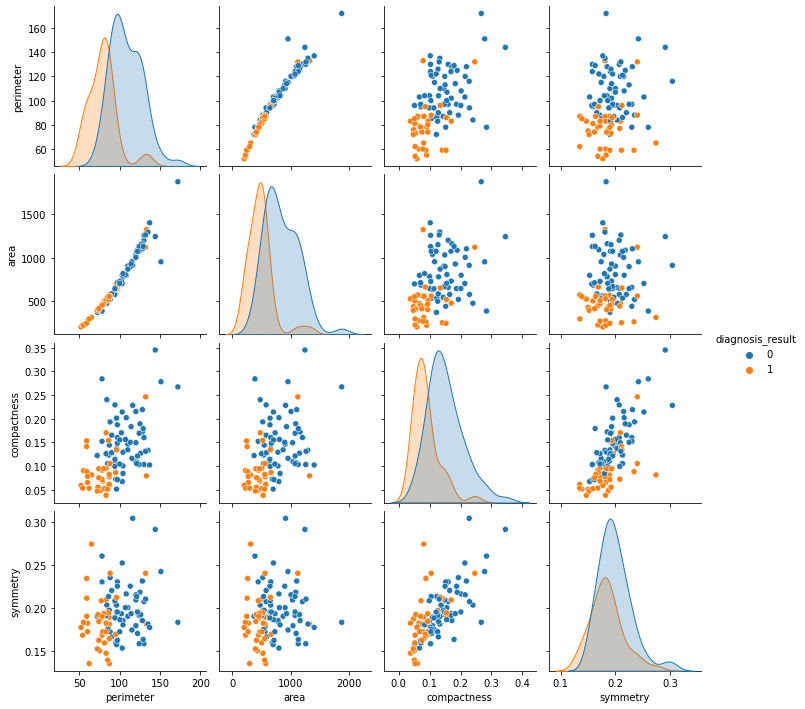

In [6]:
sns.pairplot(df[['diagnosis_result', 'perimeter', 'area', 'compactness', 'symmetry']], hue='diagnosis_result')

Even though there is some overlap between the data points, the classes are clearly separated. This suggests that these points are very useful in our final output prediction.

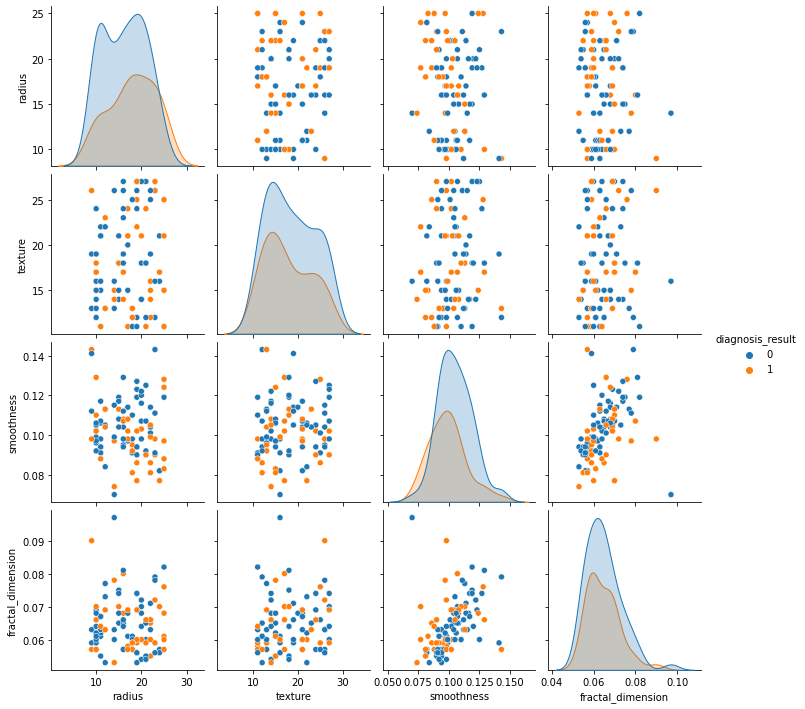

In [7]:
sns.pairplot(df.drop(columns=['perimeter', 'area', 'compactness', 'symmetry']), hue='diagnosis_result')

The other classes seem to overlap almost completely failing to be useful features.

*Note that they might seem as useful attributes if we plot them with the ones used above. But, their individual help to predict the output is negligible.*

## Feature Engineering

An important aspect of engineering features is normalising the data. We must make sure all the attributes belong to the same range so that we are able to avoid unnessecary numeric biases.

In [8]:
x_col = df[['perimeter', 'area', 'compactness', 'symmetry']]
y_col = df['diagnosis_result']

In [9]:
x_col

,perimeter,area,compactness,symmetry
0,151,954,0.278,0.242
1,133,1326,0.079,0.181
2,130,1203,0.160,0.207
3,78,386,0.284,0.260
4,135,1297,0.133,0.181
...,...,...,...,...
95,132,1264,0.131,0.210
96,78,451,0.071,0.190
97,62,295,0.053,0.135
98,74,413,0.075,0.162


It is important for us to separate out the output columnn before we normalise the data. This helps us maintain the data integrity by not changing how the output is provided.

In [10]:
mms = MinMaxScaler()
x_norm = mms.fit_transform(x_col)

In [11]:
final_df = pd.DataFrame()

In [12]:
final_df['diagnosis_result'] = y_col

In [13]:
final_df[['perimeter', 'area', 'compactness', 'symmetry']] = x_norm

In [14]:
final_df

,diagnosis_result,perimeter,area,compactness,symmetry
0,0,0.825000,0.448687,0.781759,0.633136
1,1,0.675000,0.670644,0.133550,0.272189
2,0,0.650000,0.597255,0.397394,0.426036
3,0,0.216667,0.109785,0.801303,0.739645
4,0,0.691667,0.653341,0.309446,0.272189
...,...,...,...,...,...
95,0,0.666667,0.633652,0.302932,0.443787
96,1,0.216667,0.148568,0.107492,0.325444
97,1,0.083333,0.055489,0.048860,0.000000
98,1,0.183333,0.125895,0.120521,0.159763


In [15]:
final_df.to_csv('../data/final_dataset.csv', index=False)